In [1]:
from config import *
from dataset import *

In [2]:
train_set = CarlaDataset(
  base_dir=DATA_DIR,
  townslist=TRAIN_TOWN_LIST,
  image_size=IMAGE_SIZE,
  use_imagenet_norm=USE_IMAGENET_NORM,
  sequence_size=SEQUENCE_SIZE
)

[CarlaDataset] Loading Town10HD: 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


In [7]:
import matplotlib.pyplot as plt
from tqdm import trange
from torch.utils.data import DataLoader

steer_values = []
throttle_values = []

train_loader =  DataLoader(train_set, batch_size=1, shuffle=True, num_workers=8)
for data in (t := tqdm(train_loader)):
    _, targets = data
    steer_values.append(targets[0][0])
    throttle_values.append(targets[0][1])

100%|██████████| 59935/59935 [18:17<00:00, 54.63it/s]


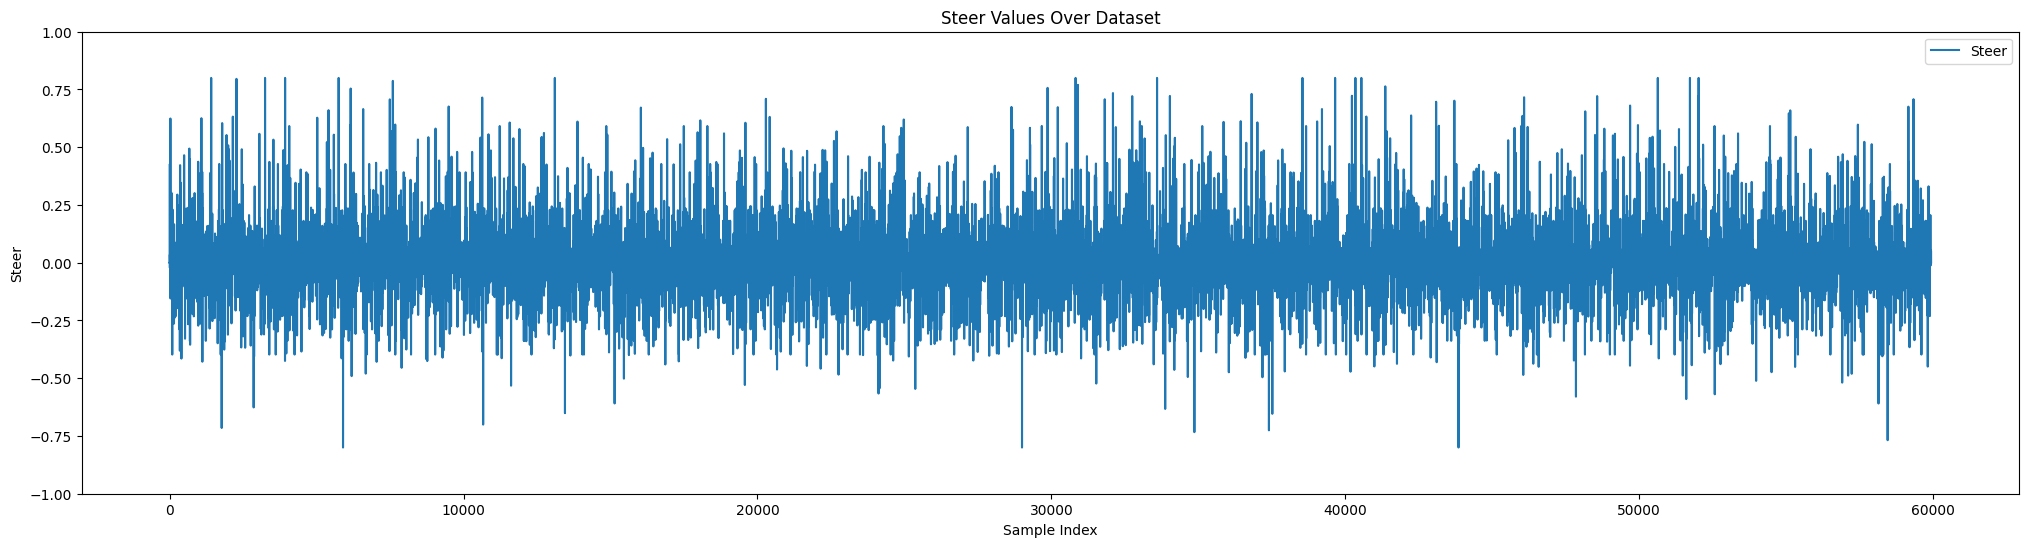

In [12]:
# plot steer values
plt.figure(figsize=(25, 6))  # Adjust width as needed
plt.plot(steer_values, label="Steer")
plt.ylim(-1.0, 1.0)
plt.title("Steer Values Over Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Steer")
plt.legend()
plt.show()


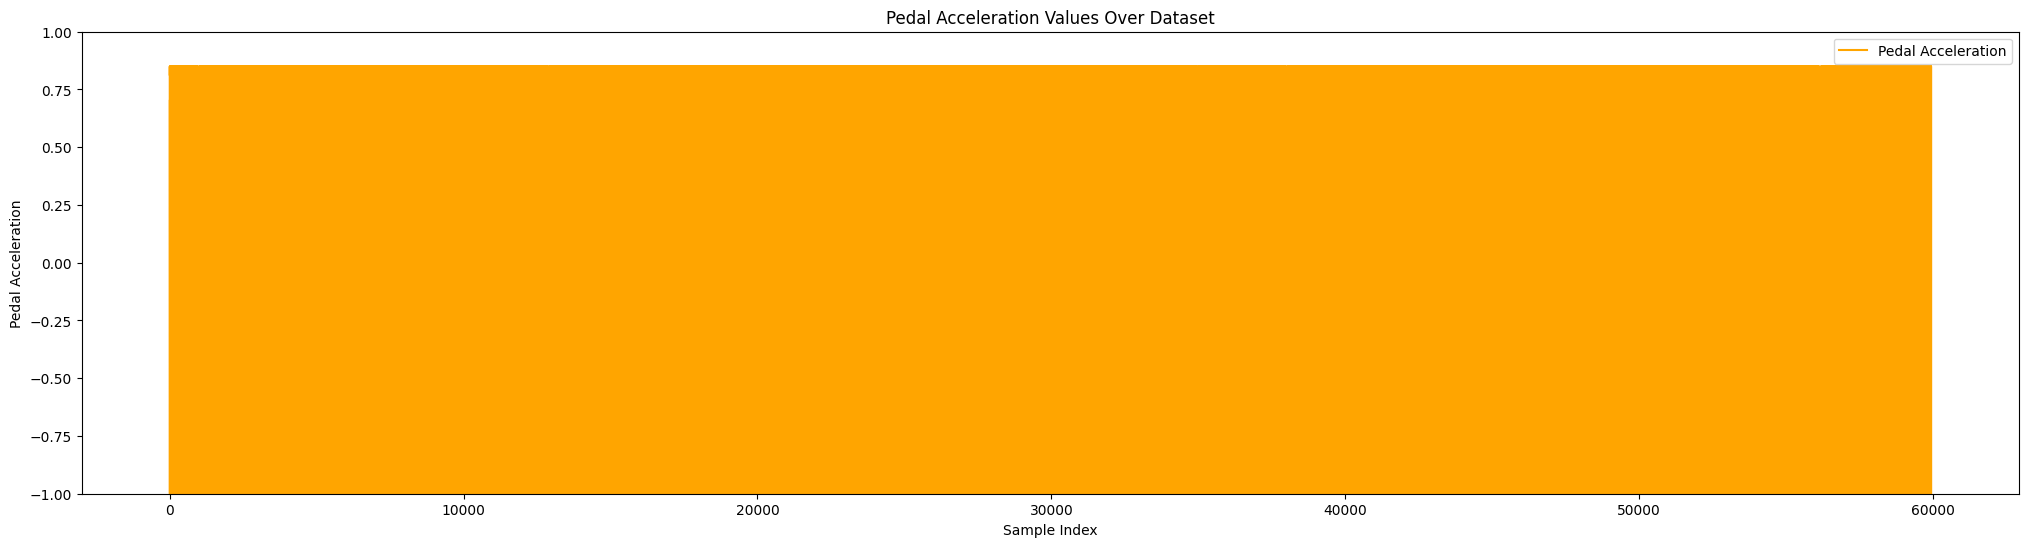

In [13]:
# plot pedal acc values
plt.figure(figsize=(25, 6))  # Adjust width as needed
plt.plot(throttle_values, label="Pedal Acceleration", color="orange")
plt.ylim(-1.0, 1.0)
plt.title("Pedal Acceleration Values Over Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Pedal Acceleration")
plt.legend()
plt.show()